#Breast Cancer Trait

Data Source : Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W.. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

#Data Preparation and General Analysis



In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [4]:
cols = ["ID", "Diagnosis", "Radius", "Texture", "Perimeter", "Area", "Smoothness", "Compactness", "Concavity", "Concave Points", "Symmetry", "Fractal Dimension"]
df = pd.read_csv('wdbc.data')
df.drop(df.iloc[:, 12:], inplace=True, axis=1)
df.columns = cols
df['Diagnosis']= (df['Diagnosis']=='M').astype(int)
df.head()


,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave Points,Symmetry,Fractal Dimension
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613


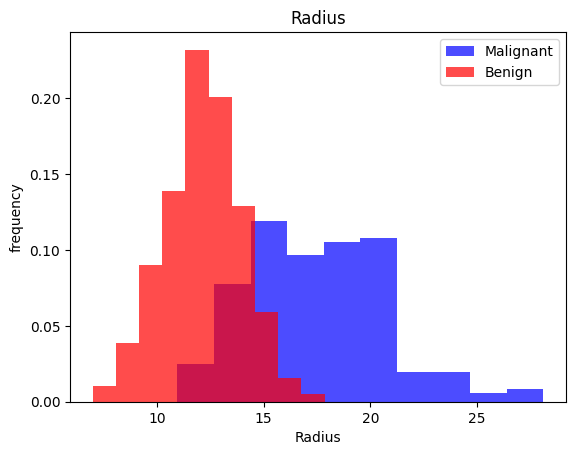

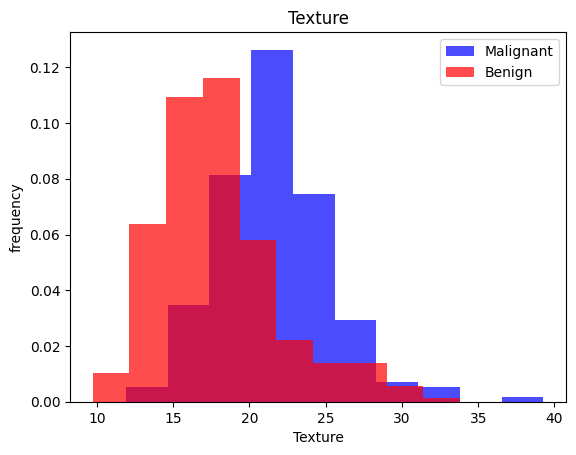

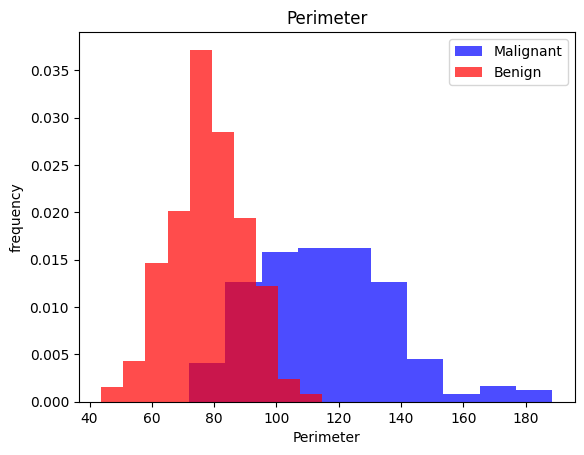

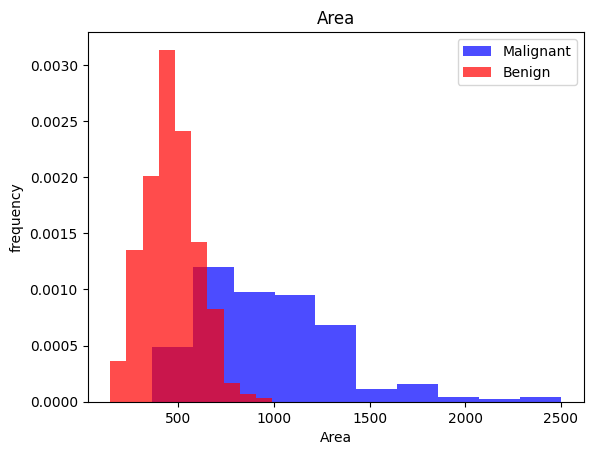

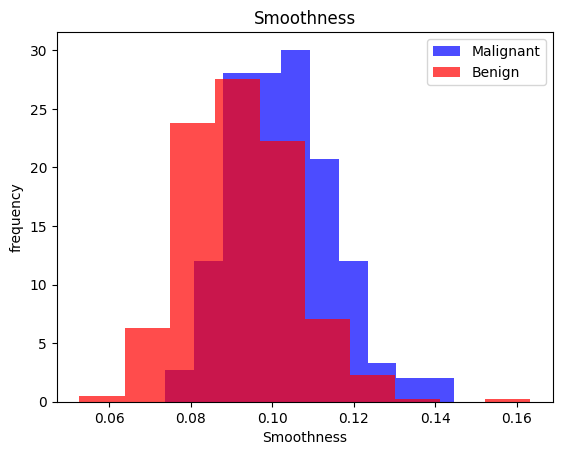

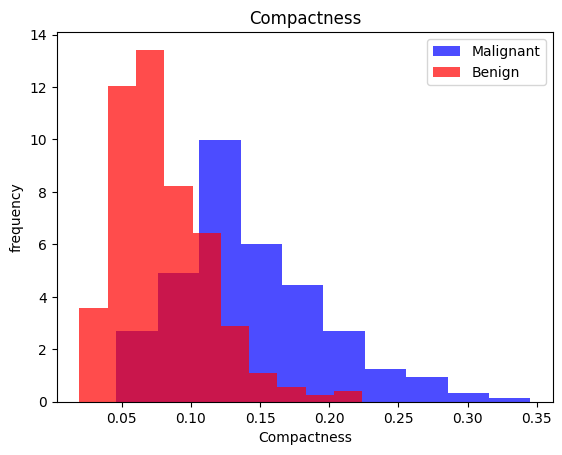

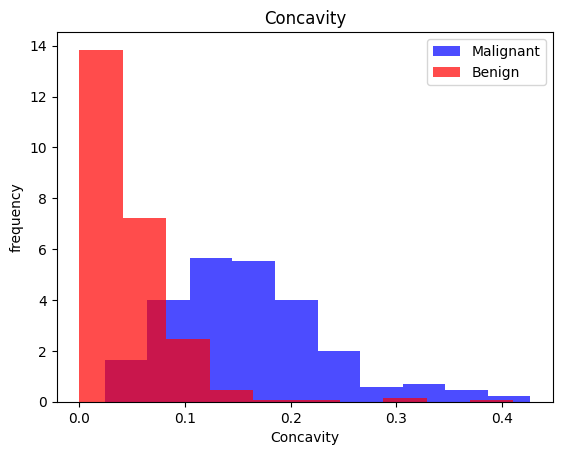

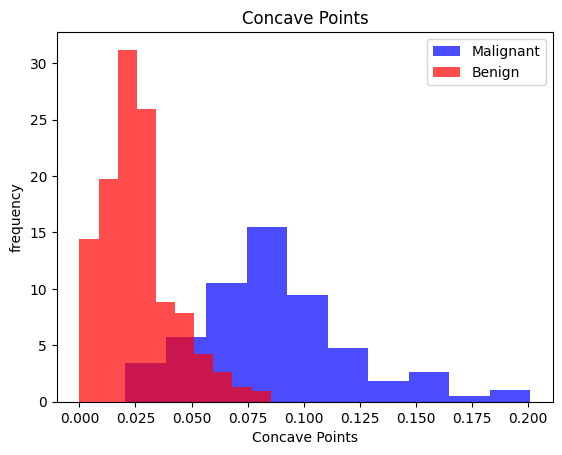

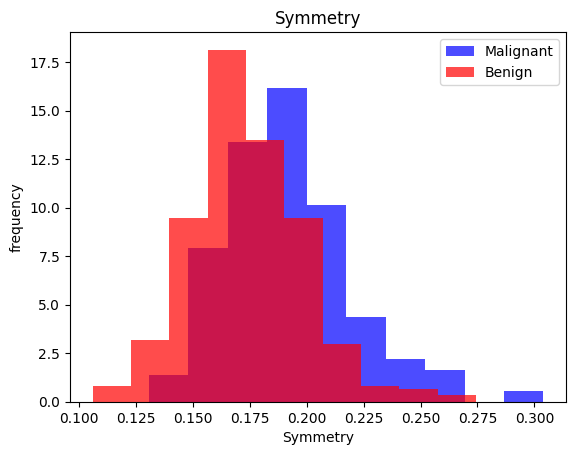

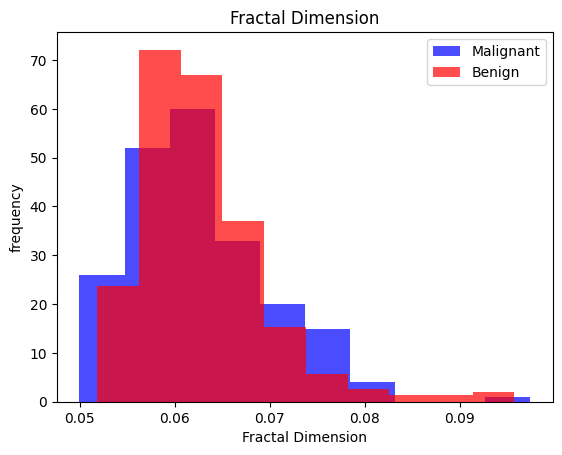

In [5]:
for label in cols[2:12]:
  plt.hist(df[df["Diagnosis"]==1][label], color='blue', label ='Malignant', alpha=0.7, density=True)
  plt.hist(df[df["Diagnosis"]==0][label], color='red', label ='Benign', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('frequency')
  plt.xlabel(label)
  plt.legend()
  plt.show()

Dari graphs di atas bisa disimpulkan bahwa trait dari data dapat memprediksi kanker payudara karena cluster merah dan biru membentuk pola tersendiri. Namun kesimpulan tersebut masih bersifat kualitatif dan masih harus diselidiki lagi

<Axes: >

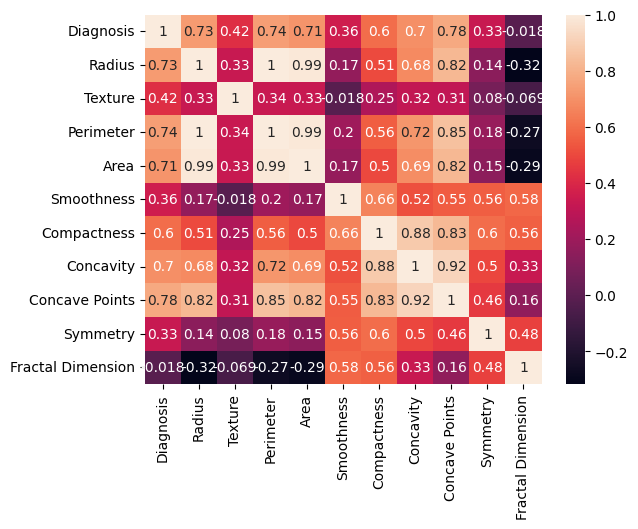

In [44]:
sns.heatmap(df.iloc[:, 1:12].corr(), annot=True)

Diagnosis berkolerasi positif dengan seluruh trait yang ada

#Train and test datasets

In [88]:
X = df.iloc[:, 2:12].values
y = df.iloc[:, 1].values

In [89]:
from sklearn.model_selection import train_test_split
#training 75% and testing sets 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [90]:
ros = StandardScaler()
#scale data so the mean approximately 0 and its standard deviation 1
X_train = ros.fit_transform(X_train)
X_test = ros.fit_transform(X_test)

#k-Nearest Neighborhood


In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [96]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [97]:
y_pred = knn_model.predict(X_test)

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        92
           1       0.92      0.90      0.91        50

    accuracy                           0.94       142
   macro avg       0.93      0.93      0.93       142
weighted avg       0.94      0.94      0.94       142



#Naive Bayes

In [99]:
from sklearn.naive_bayes import GaussianNB

In [100]:
nb_model = GaussianNB()
nb_model.fit = nb_model.fit(X_train, y_train)

In [101]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        92
           1       0.90      0.88      0.89        50

    accuracy                           0.92       142
   macro avg       0.92      0.91      0.91       142
weighted avg       0.92      0.92      0.92       142



#Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [115]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        92
           1       0.91      0.96      0.93        50

    accuracy                           0.95       142
   macro avg       0.94      0.95      0.95       142
weighted avg       0.95      0.95      0.95       142

